In [3]:
import pandas as pd

# Path to the XVG file
xvg_file_path = 'one_molar\hbond-ade-water.xvg'

# Read the XVG file, skip header lines, and extract data into a DataFrame
with open(xvg_file_path, 'r') as file:
    lines = file.readlines()

# Find the line where the actual data starts
start_index = 0

# Extract data into a DataFrame
data = [line.strip().split() for line in lines[start_index+1:]]
df = pd.DataFrame(data, columns=['Time', 'val','1'])

df = df.drop(columns=['1'])
df[['Time', 'val']] = df[['Time', 'val']].apply(pd.to_numeric)

# Save the DataFrame to a CSV file
csv_file_path = 'ade-water.csv'
df.to_csv(csv_file_path, index=False)

print(f'Conversion completed. CSV file saved as: {csv_file_path}')


Conversion completed. CSV file saved as: ade-water.csv


In [4]:
df.head()

,Time,val
0,20.0,236
1,40.0,233
2,60.0,233
3,80.0,232
4,100.0,219


### RMSD

In [9]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
data = pd.read_csv("rmsd.csv")

In [75]:
data.columns

Index(['Time', 'val'], dtype='object')

In [76]:
data.head(-5)

,Time,val
0,20.0,0.109699
1,40.0,0.155153
2,60.0,0.208159
3,80.0,0.242039
4,100.0,0.257169
...,...,...
49990,999820.0,1.122420
49991,999840.0,1.114373
49992,999860.0,1.101424
49993,999880.0,1.104749


In [77]:
data.columns = ['Time','Ang']
data['Ang']=10*data['Ang']
data.head()

,Time,Ang
0,20.0,1.096987
1,40.0,1.551528
2,60.0,2.081589
3,80.0,2.420387
4,100.0,2.571685


#### Histogram

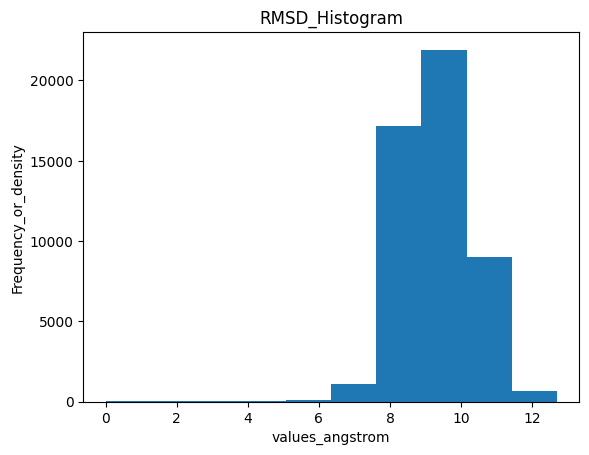

In [26]:
plt.hist(data['Ang'])
plt.xlabel('values_angstrom')
plt.ylabel("Frequency_or_density")
plt.title('RMSD_Histogram')
plt.show()

In [78]:
import numpy as np

mean_b = np.mean(data['Ang'])
std_dev_b = np.std(data['Ang'])

print("Mean of 'b':", mean_b)
print("Standard Deviation of 'b':", std_dev_b)


Mean of 'b': 10.62802146952
Standard Deviation of 'b': 1.4560909523430348


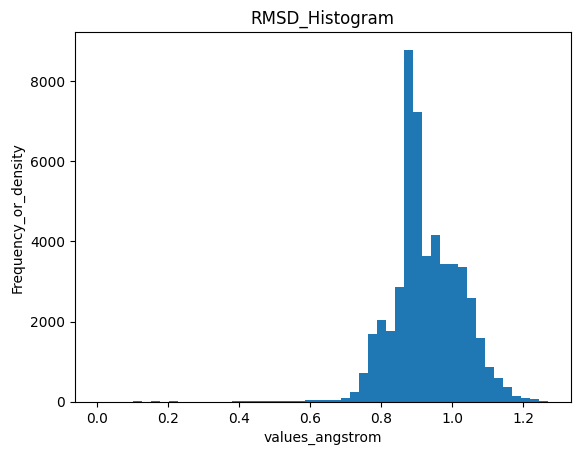

In [16]:
plt.hist(data['Ang'],bins=50)
plt.xlabel('values_angstrom')
plt.ylabel("Frequency_or_density")
plt.title('RMSD_Histogram')
plt.show()

In [19]:
!pip install scipy

     ---------------------------------------- 46.2/46.2 MB 1.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Bojja\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
import scipy
from scipy.stats import norm

ModuleNotFoundError: No module named 'scipy'

In [18]:
mean,std = data['Ang'].mean(),data['Ang'].std()

In [ ]:
x = np.linspace(data['Ang'].min(),data['Ang'].max(),30)

In [ ]:
y = norm.pdf(x,mean,std)

#### Probability Distribution

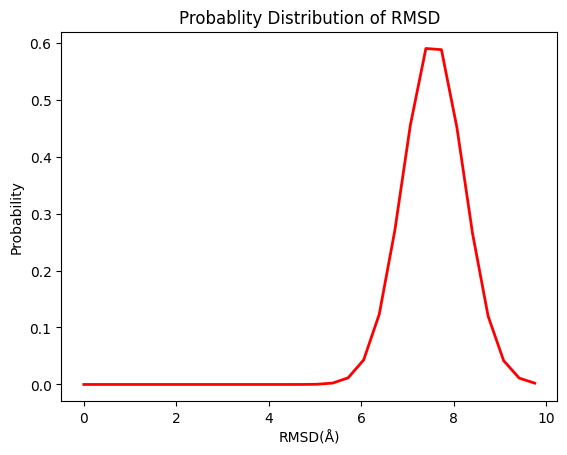

<Figure size 1400x1000 with 0 Axes>

In [ ]:
plt.plot(x, y, 'r-', linewidth=2, label='Gaussian Curve')

# Show legend
# plt.legend()
plt.title('Probablity Distribution of RMSD')
plt.xlabel('RMSD(Å)')
plt.ylabel("Probability")
# Show the plot
plt.figure(figsize=(14,10))
plt.show()

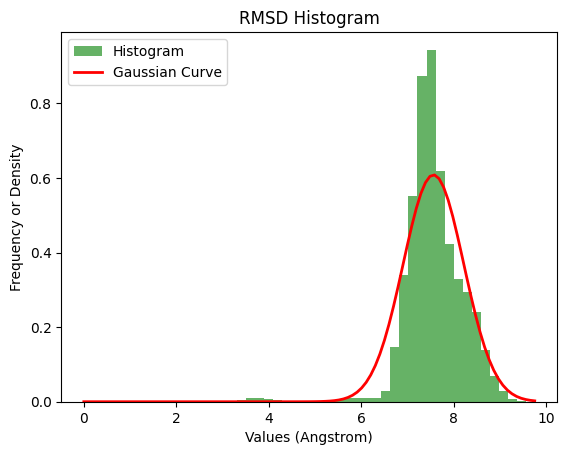

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming data is a pandas DataFrame with a column 'Angstrom'
plt.hist(data['Ang'], bins=50, density=True, alpha=0.6, color='g', label='Histogram')  # density=True for probability density instead of frequency
plt.xlabel('Values (Angstrom)')
plt.ylabel('Frequency or Density')
plt.title('RMSD Histogram')

# Calculate mean and standard deviation for the Gaussian curve
mu, std = data['Ang'].mean(), data['Ang'].std()

# Create a range of x values for the curve
x = np.linspace(data['Ang'].min(), data['Ang'].max(), 100)

# Calculate the corresponding y values from the Gaussian distribution
y = norm.pdf(x, mu, std)

# Plot the Gaussian curve
plt.plot(x, y, 'r-', linewidth=2, label='Gaussian Curve')

# Show legend
plt.legend()

# Show the plot
plt.show()


### RMSF

In [141]:
rmsf = pd.read_csv('res.csv')
print(rmsf.head())
rmsf['val']=10*rmsf['val']

   Time     val
0     2  0.3925
1     3  0.4604
2     4  0.2391
3     5  0.1693
4     6  0.1760


In [142]:
# rmsf=rmsf['A'].str.split(expand=True)
# rmsf.columns = ['res','fluctuation']
# rmsf['Time'] = rmsf['Time'].astype('int64')
rmsf['val'] = rmsf['val'].astype('float64')
rmsf.dtypes

Time      int64
val     float64
dtype: object

In [143]:
rmsf.head()

,Time,val
0,2,3.925
1,3,4.604
2,4,2.391
3,5,1.693
4,6,1.760


In [144]:
rmsf.describe()

,Time,val
count,19.000000,19.000000
mean,11.000000,3.433368
std,5.627314,1.427149
min,2.000000,1.693000
25%,6.500000,2.517000
50%,11.000000,3.051000
75%,15.500000,4.147500
max,20.000000,7.350000


### Hydrogen Bonding

#### RNA vs RNA


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('ade-ade.csv')

In [119]:
df.head(-5)

,Time,val
0,0.02,17
1,0.04,21
2,0.06,16
3,0.08,17
4,0.10,18
...,...,...
49990,999.82,22
49991,999.84,19
49992,999.86,22
49993,999.88,21


In [120]:
df.dtypes

Time    float64
val       int64
dtype: object

In [121]:
# df['Time']=df['Time'].astype('float64')
# df['Num']=df['Num'].astype('int64')

In [122]:
df.dtypes

Time    float64
val       int64
dtype: object

In [123]:
df.describe()

,Time,val
count,50000.000000,50000.000000
mean,500.010000,20.857460
std,288.678021,3.128549
min,0.020000,9.000000
25%,250.015000,19.000000
50%,500.010000,21.000000
75%,750.005000,23.000000
max,1000.000000,33.000000


In [ ]:
df['MA']=df['Num'].rolling(window=3).mean()

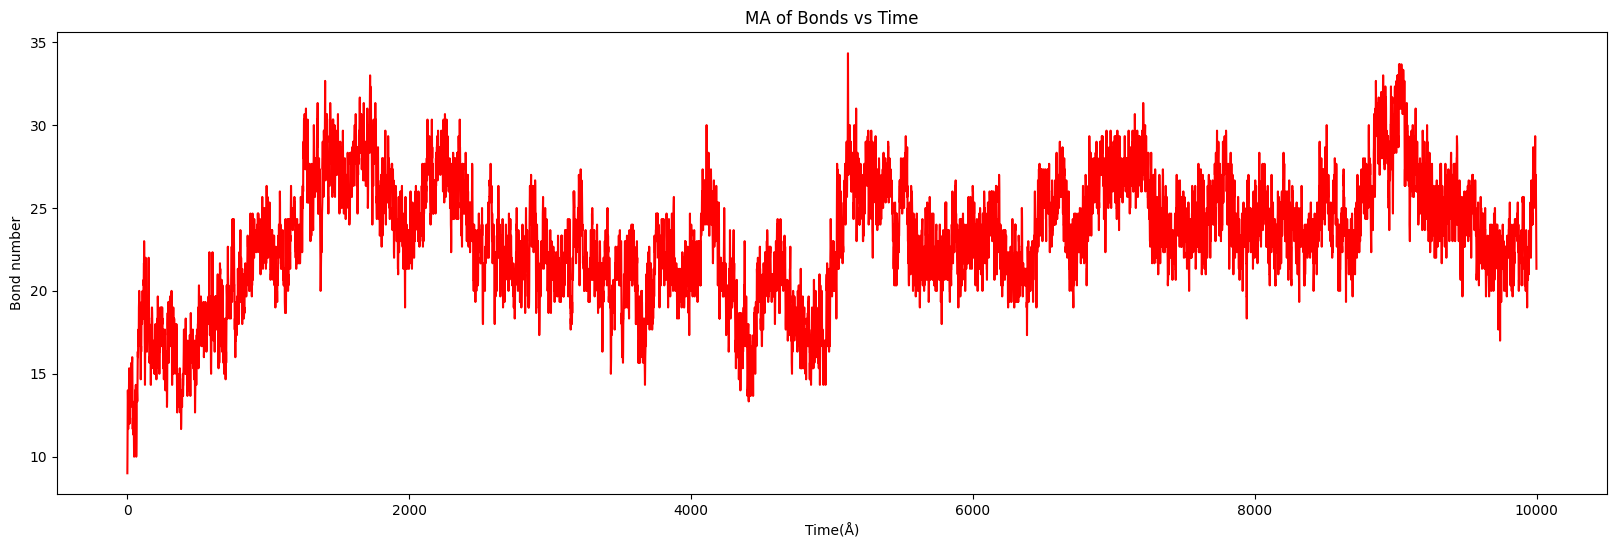

In [ ]:
plt.figure(figsize=(20,6))
plt.plot('MA',data = df,color ='red')
plt.xlabel("Time(Å)")
plt.ylabel("Bond number")
plt.title('MA of Bonds vs Time')
plt.show()

#### Water vs RNA

In [5]:
water = pd.read_csv("ade-water.csv")

In [6]:
water.head()

,Time,val
0,20.0,236
1,40.0,233
2,60.0,233
3,80.0,232
4,100.0,219


In [7]:
water.columns = ['Time','Bonds']

In [8]:
water.dtypes

Time     float64
Bonds      int64
dtype: object

In [9]:
# water['Time']=water['Time'].astype('float64')
# water['Bonds']=water['Bonds'].astype('int64')
# water.dtypes

In [10]:
water.describe()

,Time,Bonds
count,50000.000000,50000.000000
mean,500010.000000,207.528640
std,288678.021332,10.271625
min,20.000000,171.000000
25%,250015.000000,200.000000
50%,500010.000000,207.000000
75%,750005.000000,214.000000
max,1000000.000000,250.000000


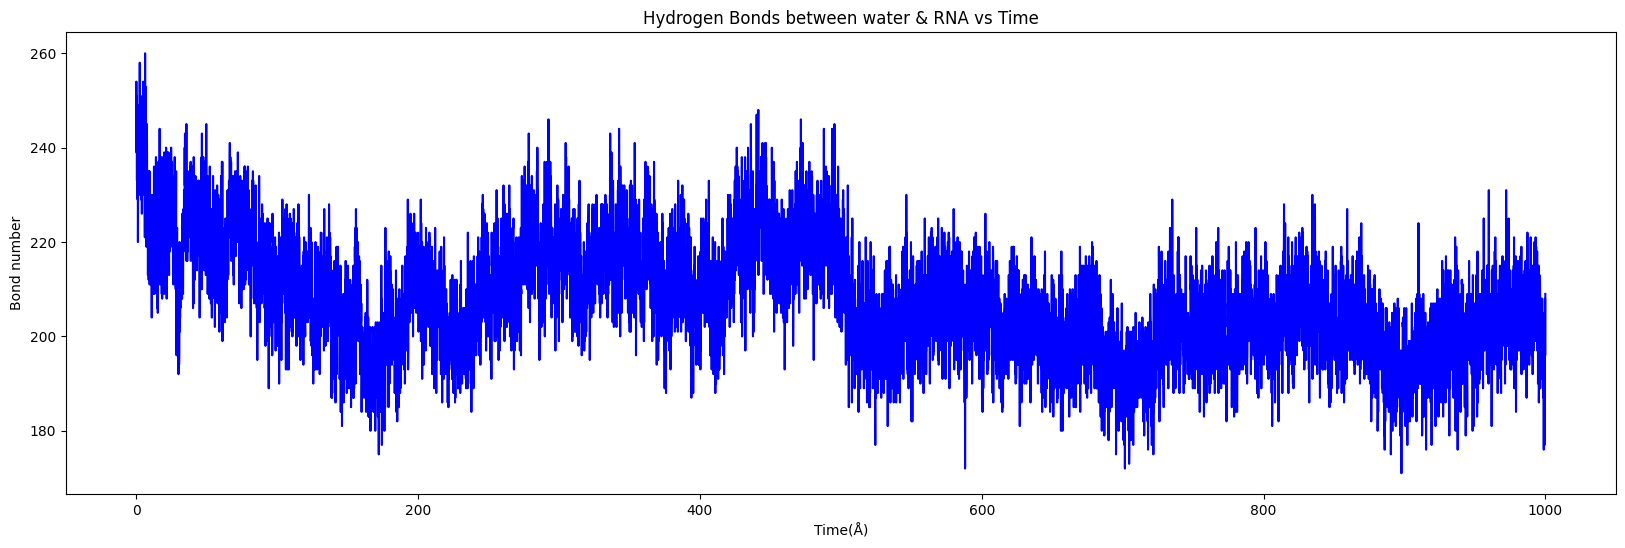

In [ ]:
plt.figure(figsize=(20,6))
plt.plot('Time','Bonds',data =water,color = 'b')
plt.xlabel('Time(Å)')
plt.ylabel("Bond number")
plt.title('Hydrogen Bonds between water & RNA vs Time')
plt.show()

In [ ]:
print("|   Bonding    |      Mean      |")
print("|--------------|----------------|")
print("| RNA vs RNA   | 23.17(±4.05)   |")
print("| RNA vs Water | 207.69(±12.12) |")


|   Bonding    |      Mean      |
|--------------|----------------|
| RNA vs RNA   | 23.17(±4.05)   |
| RNA vs Water | 207.69(±12.12) |


### Radius of Gyration

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
rg = pd.read_csv('gyrate.csv')
rg.head()

,Time,val
0,20.0,1.20781
1,40.0,1.20696
2,60.0,1.23337
3,80.0,1.20145
4,100.0,1.19788


In [134]:
# rg=rg.drop(columns=['1','2','3','4'])
rg.columns

Index(['Time', 'val'], dtype='object')

In [135]:
rg.dtypes

Time    float64
val     float64
dtype: object

In [136]:
rg.to_csv('aqeous_gyrate.csv')

In [12]:
import pandas as pd

# Replace '&' with NaN in the 'Time' column
rg['Time'] = rg['Time'].replace('&', pd.NA)

# Convert the 'Time' column to numeric, replacing non-convertible values with NaN
rg['Time'] = pd.to_numeric(rg['Time'], errors='coerce')

# Drop rows with NaN values in the 'Time' column
rg = rg.dropna(subset=['Time'])
rg.dtypes


Time    float64
Ang      object
dtype: object

In [13]:
import pandas as pd

# Replace '&' with NaN in the 'Time' column
rg['Ang'] = rg['Ang'].replace('&', pd.NA)

# Convert the 'Ang' column to numeric, replacing non-convertible values with NaN
rg['Ang'] = pd.to_numeric(rg['Ang'], errors='coerce')

# Drop rows with NaN values in the 'Ang' column
rg = rg.dropna(subset=['Ang'])
rg.dtypes


Time    float64
Ang     float64
dtype: object

In [137]:
rg['val'] = rg['val']*10

In [138]:
rg.describe()

,Time,val
count,50000.000000,50000.000000
mean,500010.000000,11.531443
std,288678.021332,0.356841
min,20.000000,10.597400
25%,250015.000000,11.307900
50%,500010.000000,11.491350
75%,750005.000000,11.704425
max,1000000.000000,14.819900


#### Probability distribution

In [ ]:
import scipy
from scipy.stats import norm

In [ ]:
mean,std = rg['Ang'].mean(),rg['Ang'].std()
x = np.linspace(rg['Ang'].min(),rg['Ang'].max(),30)
y = norm.pdf(x,mean,std)

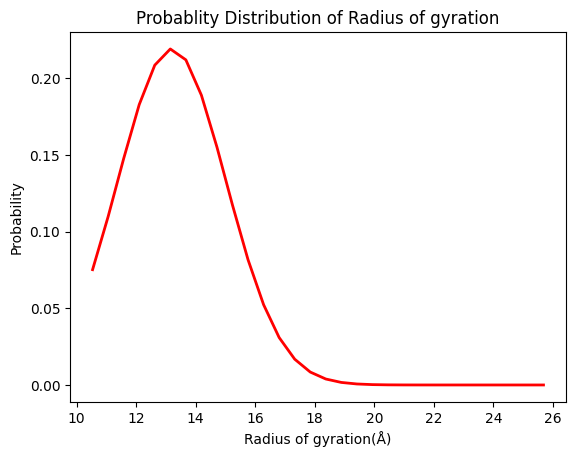

<Figure size 1400x1000 with 0 Axes>

In [ ]:
plt.plot(x, y, 'r-', linewidth=2, label='Gaussian Curve')

# Show legend
# plt.legend()
plt.title('Probablity Distribution of Radius of gyration')
plt.xlabel('Radius of gyration(Å)')
plt.ylabel("Probability")
# Show the plot
plt.figure(figsize=(14,10))
plt.show()

In [ ]:
max_value_index = np.argmax(y)
max_x_value = x[max_value_index]
print("Maximum x-axis value corresponding to the maximum PDF value:", max_x_value)

Maximum x-axis value corresponding to the maximum PDF value: 13.14766896551724


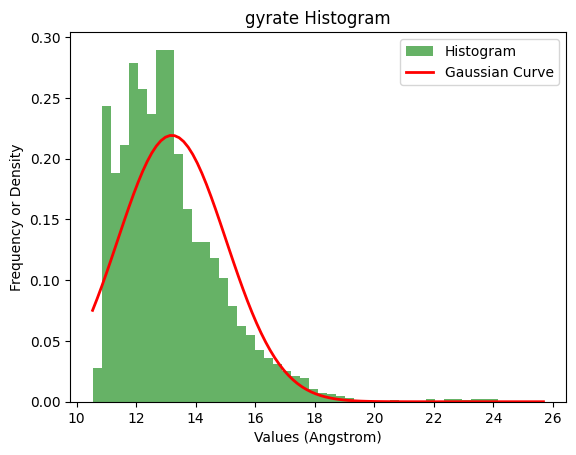

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming rg is a pandas DataFrame with a column 'Angstrom'
plt.hist(rg['Ang'], bins=50, density=True, alpha=0.6, color='g', label='Histogram')  # density=True for probability density instead of frequency
plt.xlabel('Values (Angstrom)')
plt.ylabel('Frequency or Density')
plt.title('gyrate Histogram')

# Calculate mean and standard deviation for the Gaussian curve
mu, std = rg['Ang'].mean(), rg['Ang'].std()

# Create a range of x values for the curve
x = np.linspace(rg['Ang'].min(), rg['Ang'].max(), 100)

# Calculate the corresponding y values from the Gaussian distribution
y = norm.pdf(x, mu, std)

# Plot the Gaussian curve
plt.plot(x, y, 'r-', linewidth=2, label='Gaussian Curve')

# Show legend
plt.legend()

# Show the plot
plt.show()


### End-to-End Distance

In [126]:
end = pd.read_csv('end-to-end.csv')
end['val']=10*end['val']
end.head()

,Time,val
0,0.02,25.462
1,0.04,23.279
2,0.06,23.802
3,0.08,24.424
4,0.10,23.163


In [127]:
end.columns

Index(['Time', 'val'], dtype='object')

In [128]:
# end.columns = ['A']
# end = end['A'].str.split(expand= True)
end.columns = ['Time','val']
end['Time'] = end['Time'].astype('float64') # time  ns
end['val'] = end['val'].astype('float64')


In [129]:
print(end.dtypes)
end.head()

Time    float64
val     float64
dtype: object


,Time,val
0,0.02,25.462
1,0.04,23.279
2,0.06,23.802
3,0.08,24.424
4,0.10,23.163


In [130]:
end.describe()

,Time,val
count,50000.000000,50000.000000
mean,500.010000,26.627284
std,288.678021,5.366731
min,0.020000,12.948000
25%,250.015000,22.778750
50%,500.010000,27.115000
75%,750.005000,30.727000
max,1000.000000,42.650000
